## Smoothening data using multivariave spline ##

In [4]:
import peakutils
import numpy as np
from peakutils.plot import plot as pplot
import matplotlib.pyplot as plt
from pyearth import Earth

In [5]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx


def loaddata(data_filename):
    """load matrix data"""
    data = np.genfromtxt(data_filename, delimiter='\t')
    data_nm = data[1:,0]    #wavelength in nm
    data_time = data[0,1:]
    data_z = data[1:, 1:]

    return data_nm, data_time, data_z


def loaddata_timeslice(data_filename):
    """load array data"""
    data = np.genfromtxt(data_filename, delimiter='\t')
    data_nm = data[:,0]    #wavelength in nm
    data_z_array = data[:, 1]

    return data_nm, data_z_array

In [6]:
def add_noise(nm_array, y_array, noise_coefficient):
    # Add noise
    np.random.seed(1800)
    y_noise = noise_coefficient * np.random.normal(size=nm_array.size)
    y_proc = y_array + y_noise
    
    return y_proc

In [13]:
#adapted from Jing
def Earth_Smoothing(nm_array, y_array):        
    """
    ============================================
     Plotting derivatives of simple sine function
    ============================================

     A simple example plotting a fit of the sine function
    and the derivatives computed by Earth.
    
    Notes
    -----   
    generates a denoise curve from the TA data
    Parameters
    ----------
        nm_array: wavelength array
        timedelay: time delay array
        noise_coefficient: the noise coefficients that user want to generate
    Returns
    -------
        a smoothing curve from the original noise curve   
    """

    
   # Fit an Earth model
    model = Earth(smooth=True)
    model.fit(nm_array, y_array)

   # Print the model
    #print(model.trace())
    #print(model.summary())

   # Get the predicted values and derivatives
    y_hat = model.predict(nm_array)

    # Plot true and predicted function values 
    #plt.figure(figsize=(15,8))
    ##plt.title('', fontsize = 16, fontweight = 'bold')
    #plt.xlabel('Wavelength (nm)', fontsize = 20, fontweight = 'bold')
    #plt.ylabel('Intensity (a.u.)', fontsize = 20, fontweight = 'bold')
    #plt.xticks(fontsize = 20)
    #plt.yticks(fontsize = 20)
    #plt.plot(nm_array, y_array, 'r', label = 'Before')
    #plt.plot(nm_array, y_hat, 'b', linewidth = 4, label = 'After')
    #plt.legend(fontsize = 20)

    
    return  y_hat

* Loading data array

In [8]:
array_filename = 'twogaussian_array.txt'
datanm, dataz = loaddata_timeslice(array_filename)

* Add noise to synthetic data

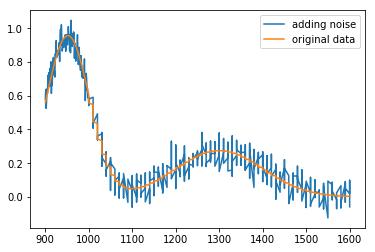

In [9]:
noisyz = add_noise(datanm, dataz, 0.05)
plt.figure()
plt.plot(datanm, noisyz, label = 'adding noise')
plt.plot(datanm, dataz, label = 'original data')
plt.legend()

/Users/demiliu/miniconda3/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.7-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/demiliu/miniconda3/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.7-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


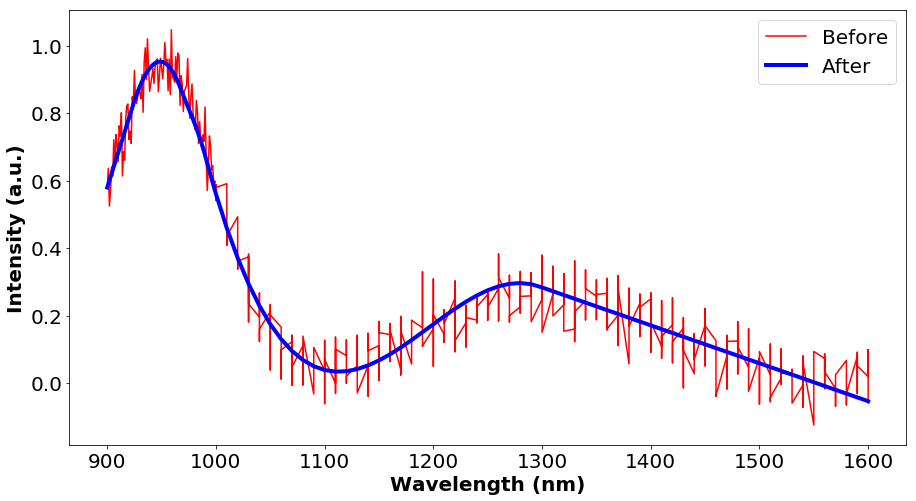

In [10]:
earthz = Earth_Smoothing(datanm, noisyz)

In [11]:
def smooth_matrix(nm_array,data_matrix,noise_coefficient):
    num_array = np.shape(data_matrix)[1]
    noise_matx = np.empty_like(data_matrix)
    smooth_matx = np.empty_like(data_matrix)
    for i in range(num_array):
        data_array = data_matrix[:, i]
        noise_array = add_noise(nm_array, data_array, noise_coefficient)
        smooth_array = Earth_Smoothing(nm_array, data_array)
        noise_matx[:, i] = noise_array
        smooth_matx[:, i] = smooth_array
    
    return noise_matx, smooth_matx

In [12]:
matx_filename = '20180418_twogaussian_spectralshfit.txt'
datanm, datatime, dataz_matx = loaddata(matx_filename)

In [14]:
noisez_matx, earthz_matx = smooth_matrix(datanm, dataz_matx, 0.1)

/Users/demiliu/miniconda3/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.7-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/demiliu/miniconda3/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.7-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


In [25]:
def twodcontourplot(tadata_nm, tadata_timedelay, tadata_z_corr):
    """
    make contour plot
    
    Args:
        tadata_nm: wavelength array
        tadata_timedelay: time delay array
        tadata_z_corr: matrix of z values
        
    """
    nm, timedelay = np.linspace(tadata_nm.min(), tadata_nm.max(), 100), np.linspace(tadata_timedelay.min(), tadata_timedelay.max(), 100)    
    timedelayi, nmi = np.meshgrid(tadata_timedelay, tadata_nm)

    #find the maximum and minimum
    #these are used for color bar
    z_min = np.amin(np.amin(tadata_z_corr, axis = 1))
    z_max = np.amax(np.amax(tadata_z_corr, axis = 1))

    
    return [nmi, timedelayi, z_min, z_max]

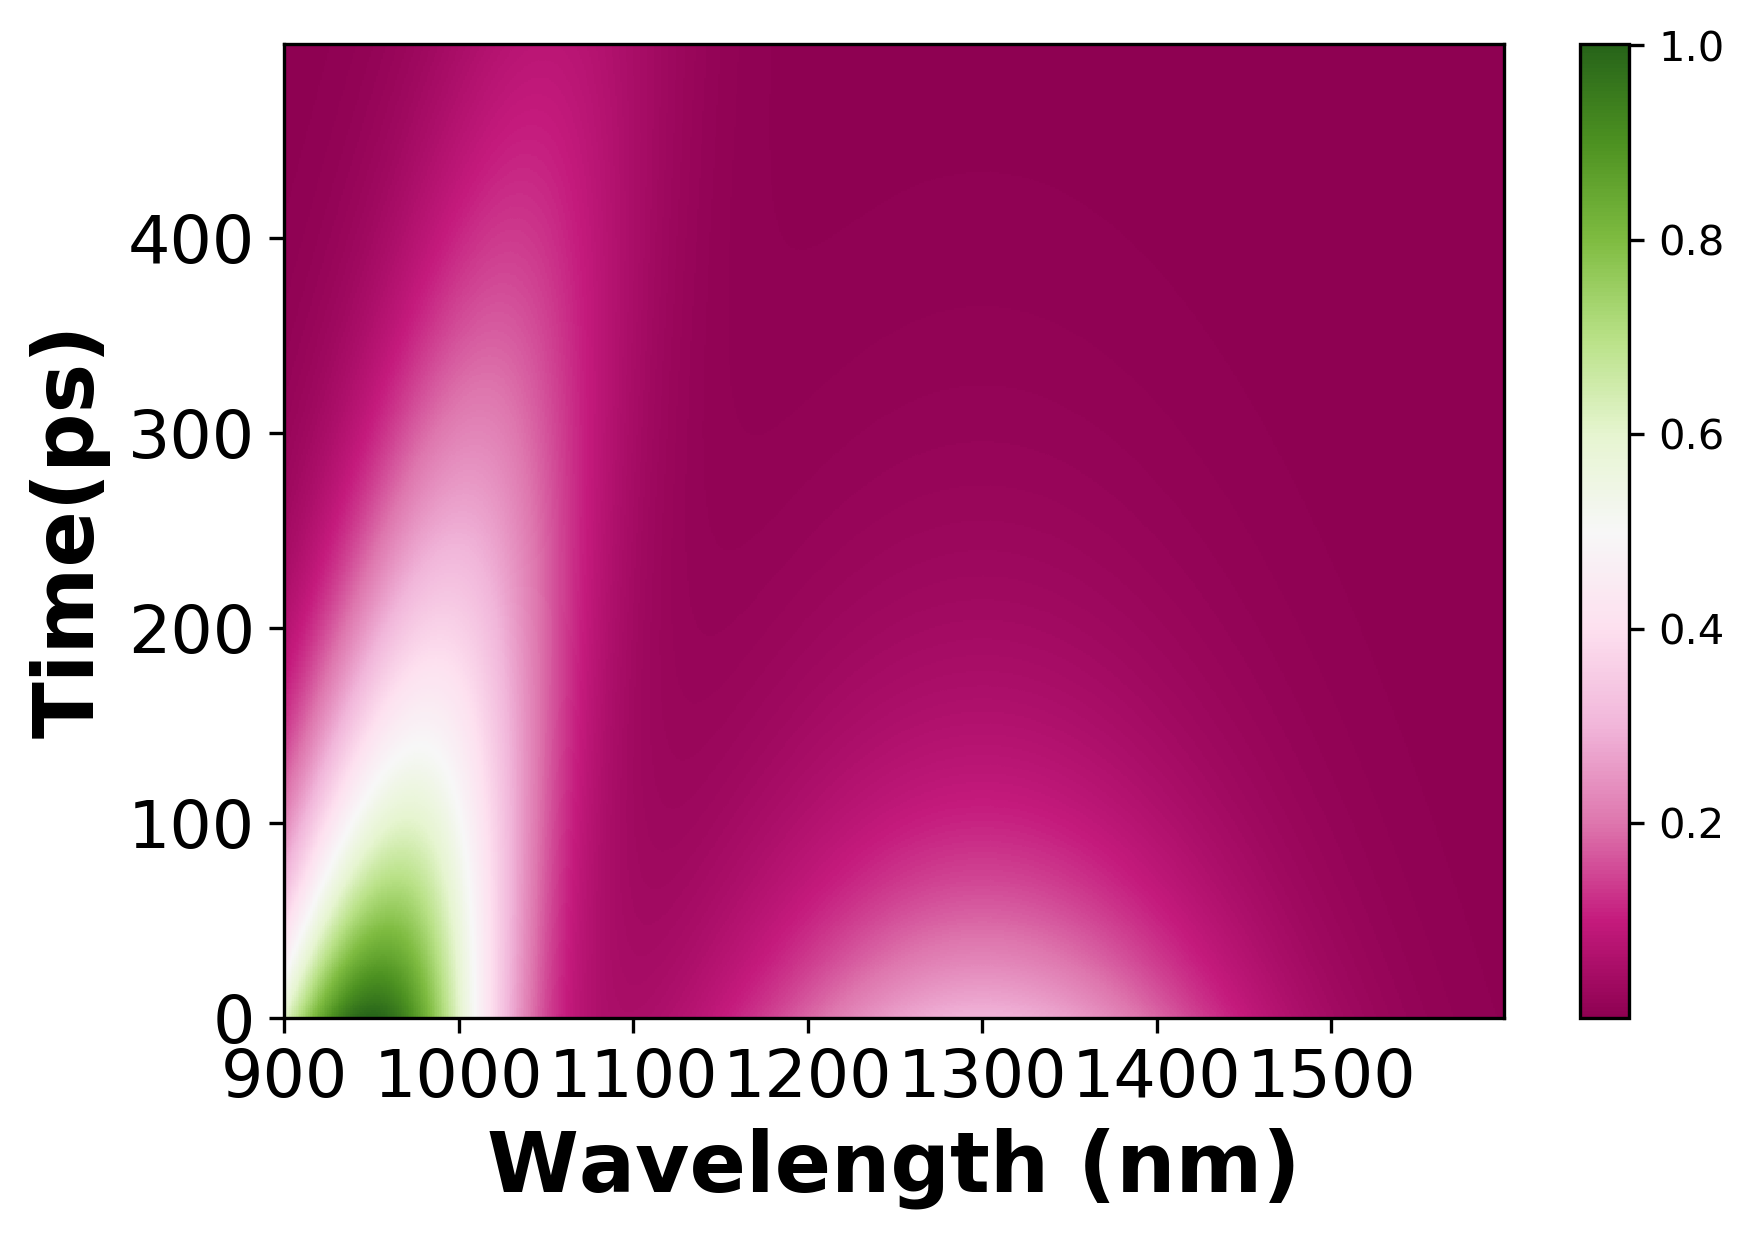

In [32]:
original_contour = twodcontourplot(datanm, datatime, dataz_matx)
nm_contour, time_contour, min_contour, max_contour = original_contour[0], original_contour[1], original_contour[2], original_contour[3]

plt.figure(dpi=300)
#plt.xlim(450,800)
#plt.title('Two gaussians', fontsize = 16, fontweight = 'bold')
#plt.ylim(0,50)
plt.xlabel('Wavelength (nm)', fontsize = 20, fontweight = 'bold')
plt.ylabel('Time(ps)', fontsize = 20, fontweight = 'bold')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.pcolormesh(nm_contour, time_contour, dataz_matx, cmap = 'PiYG', vmin=min_contour, vmax=max_contour)
plt.colorbar()
plt.tight_layout(pad=0.25, h_pad=None, w_pad=None, rect=None)


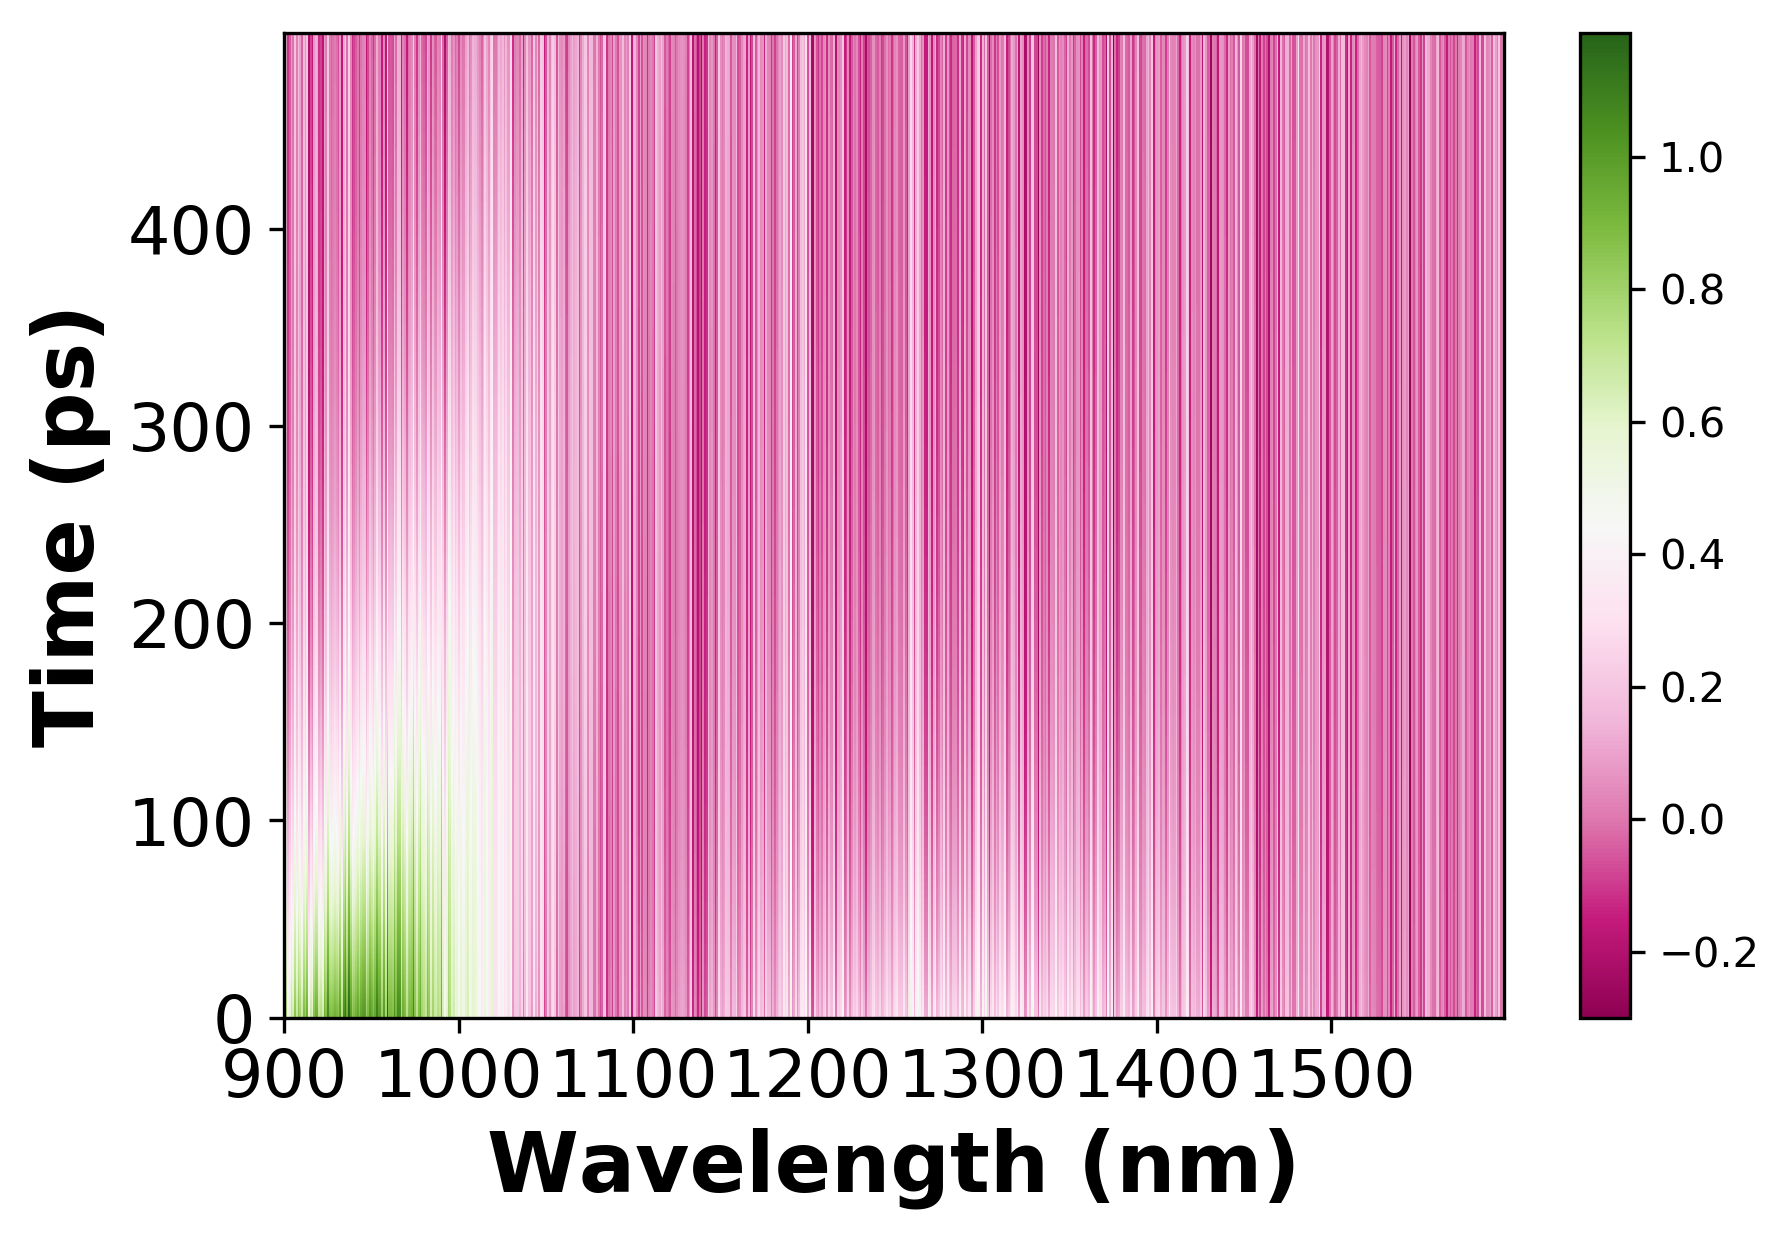

In [34]:
noise_contour = twodcontourplot(datanm, datatime, noisez_matx)
nm_contour, time_contour, min_contour, max_contour = noise_contour[0], noise_contour[1], noise_contour[2], noise_contour[3]

plt.figure(dpi=300)
#plt.xlim(450,800)
#plt.title('Two gaussians with added noise', fontsize = 16, fontweight = 'bold')
#plt.ylim(0,50)
plt.xlabel('Wavelength (nm)', fontsize = 20, fontweight = 'bold')
plt.ylabel('Time (ps)', fontsize = 20, fontweight = 'bold')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.pcolormesh(nm_contour, time_contour, noisez_matx, cmap = 'PiYG', vmin=min_contour, vmax=max_contour)
plt.colorbar()
plt.tight_layout(pad=0.25, h_pad=None, w_pad=None, rect=None)


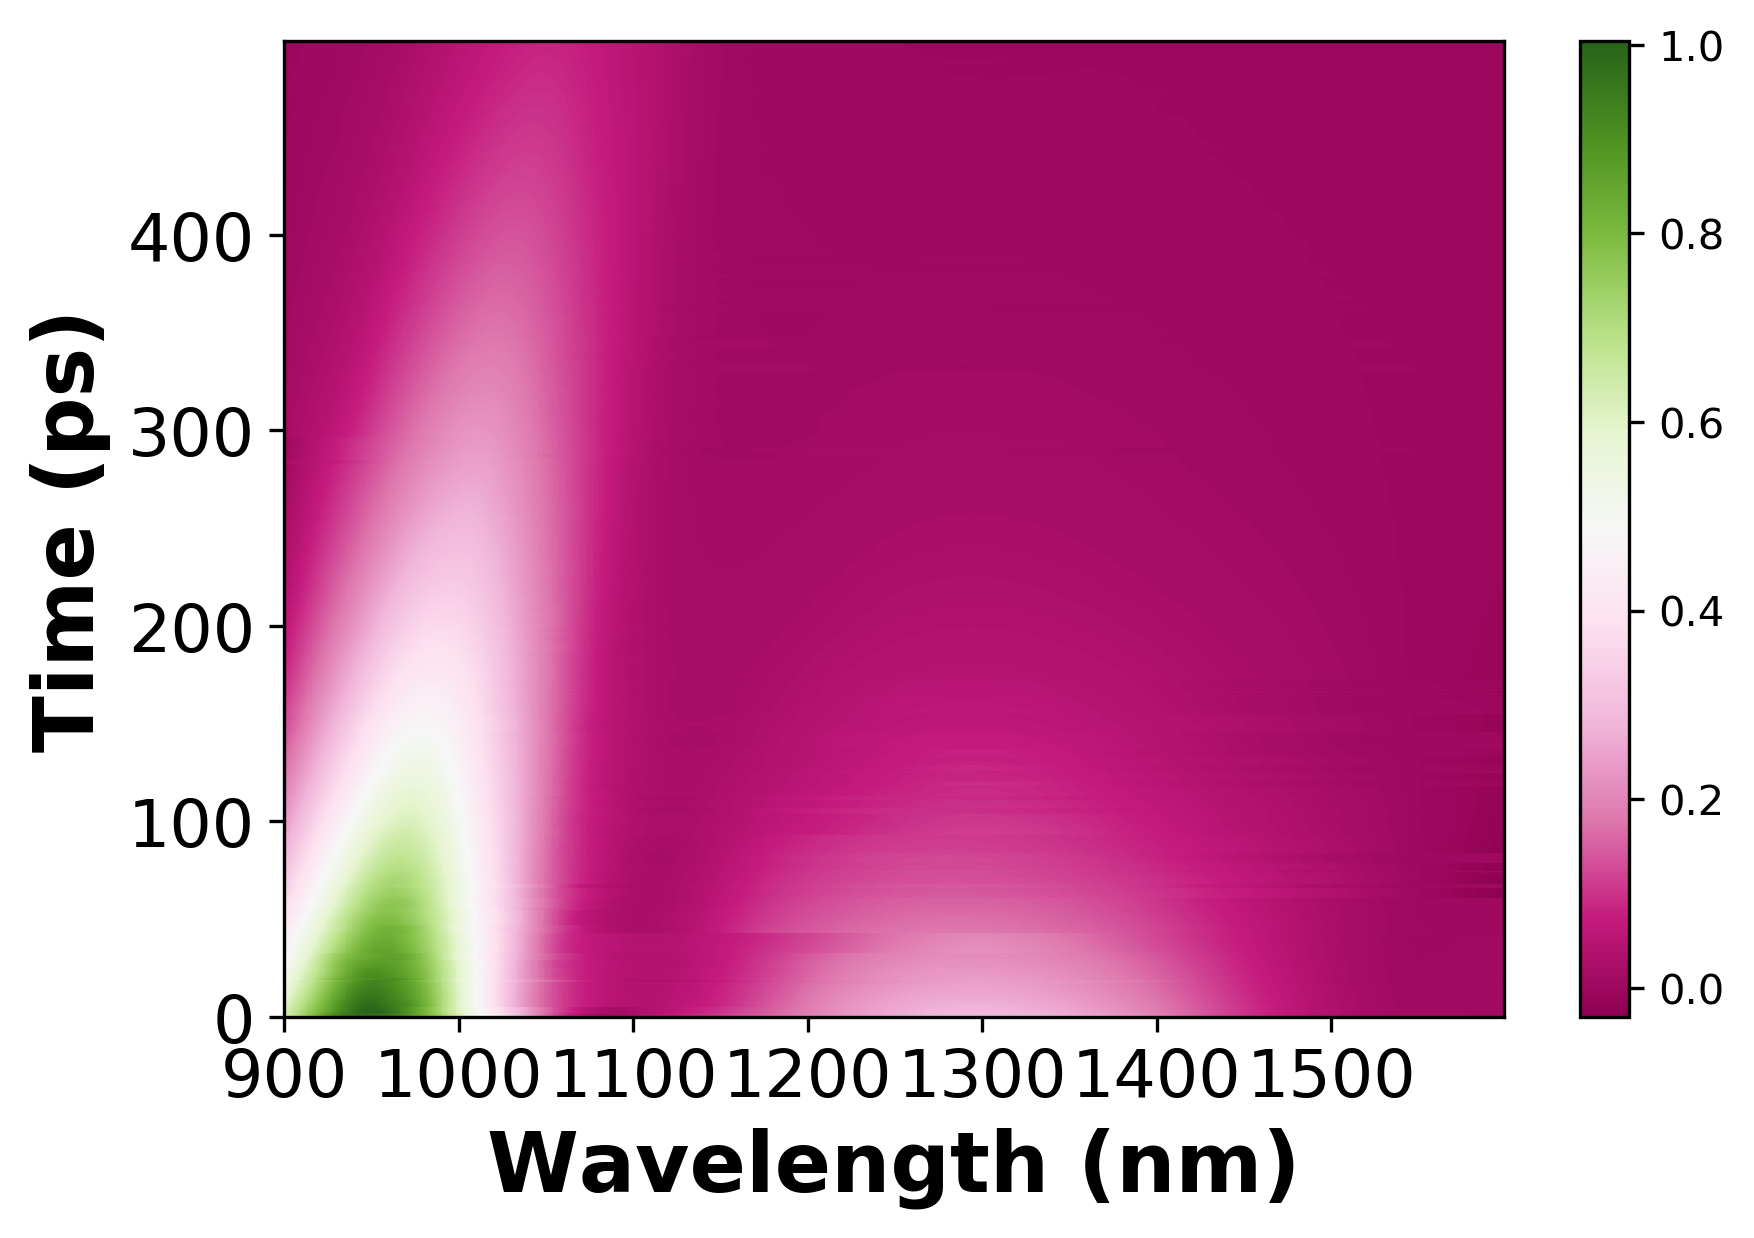

In [35]:
smooth_contour = twodcontourplot(datanm, datatime, earthz_matx)
nm_contour, time_contour, min_contour, max_contour = smooth_contour[0], smooth_contour[1], smooth_contour[2], smooth_contour[3]

plt.figure(dpi = 300)
#plt.xlim(450,800)
#plt.title('Two gaussians after smoothening', fontsize = 16, fontweight = 'bold')
#plt.ylim(0,50)
plt.xlabel('Wavelength (nm)', fontsize = 20, fontweight = 'bold')
plt.ylabel('Time (ps)', fontsize = 20, fontweight = 'bold')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.pcolormesh(nm_contour, time_contour, earthz_matx, cmap = 'PiYG', vmin=min_contour, vmax=max_contour)
plt.colorbar()
plt.tight_layout(pad=0.25, h_pad=None, w_pad=None, rect=None)

## Residue after smoothening ##

In [115]:
residue_matx = dataz_matx - earthz_matx

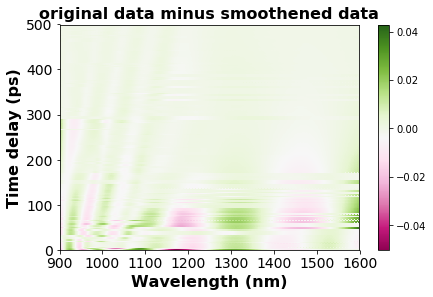

In [116]:
residue_contour = twodcontourplot(datanm, datatime, residue_matx)
nm_contour, time_contour, min_contour, max_contour = residue_contour[0], residue_contour[1], residue_contour[2], residue_contour[3]

plt.figure()
#plt.xlim(450,800)
plt.title('original data minus smoothened data', fontsize = 16, fontweight = 'bold')
#plt.ylim(0,50)
plt.xlabel('Wavelength (nm)', fontsize = 16, fontweight = 'bold')
plt.ylabel('Time delay (ps)', fontsize = 16, fontweight = 'bold')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.pcolormesh(nm_contour, time_contour, residue_matx, cmap = 'PiYG', vmin=min_contour, vmax=max_contour)
plt.colorbar()
plt.tight_layout(pad=0.25, h_pad=None, w_pad=None, rect=None)

## calculate the 2nd derivative of the smooth matrix ##
* smooth data should be a flat line

In [ ]:
d1_earth = np.empty_like(earthz_matx)
d2_earth = np.empty_like(d1_earth)

plt.figure()
for i in range(np.shape(earthz_matx)[1]):
    d1_earth[:, i] = np.gradient(earthz_matx[:, i])
    d2_earth[:, i] = np.gradient(earthz_matx[:, i], 2)
    plt.plot(datanm, d2_earth)


## Find peaks in data matrix after smothening ##

In [15]:
def findpeak(data_z_array, threshold, min_dist):
    """find peaks and return indices of the peaks"""    
    peak_indices = peakutils.indexes(data_z_array, thres=threshold, min_dist=min_dist)
    
    return peak_indices


def peakchar(data_nm, data_z_array, peak_index):
    """find the peak width, and intensity"""
    num_peaks = len(peak_index)
    
    #array of peak height
    height = [data_z_array[idx] for idx in peak_index]
    
    #array of peak width
    half_height = [ht / 2 for ht in height]

    fwhm_idx_1 = np.empty_like(half_height)
    fwhm_idx_2 = np.empty_like(fwhm_idx_1)
    fwhm_nm_1 = np.empty_like(fwhm_idx_1)
    fwhm_nm_2 = np.empty_like(fwhm_idx_1)
    
    for i in range(num_peaks):
        #find the index and nmof the left side of the fwhm
        if i == 0:
            fwhm_idx_1[i] = find_nearest(data_z_array[0:peak_index[i]], half_height[i])
        else:
            fwhm_idx_1[i] = find_nearest(data_z_array[peak_index[i-1]:peak_index[i]], half_height[i]) + peak_index[i-1]

        fwhm_nm_1[i] = data_nm[int(fwhm_idx_1[i])]
        
        #find the index and nm of the right side of the fwhm   
        fwhm_idx_2[i] = find_nearest(data_z_array[peak_index[i]:], half_height[i]) + peak_index[i]

        fwhm_nm_2[i] = data_nm[int(fwhm_idx_2[i])]
    
    #find fwhm
    fwhm = fwhm_nm_2 - fwhm_nm_1

    return height, fwhm

In [16]:
def peak_matrix(nm_array,data_matrix,num_timeslice, threshold, mindist):
    """find peaks in a data matrix"""
    peak_idx_matx = np.zeros((num_timeslice,2))
    peak_height_matx = np.empty_like(peak_idx_matx)
    peak_fwhm_matx = np.empty_like(peak_height_matx)
    
    for i in range(num_timeslice):
        data_timeslice = data_matrix[:, i]
        
        peak_idx = findpeak(data_timeslice, threshold, mindist)
        
        
        peak_idx_matx[i, :] = peak_idx
        
        peak_height, peak_fwhm = peakchar(nm_array, data_timeslice, peak_idx)
        peak_height_matx[i, :], peak_fwhm_matx[i, :] = peak_height, peak_fwhm 
        
    return peak_idx_matx, peak_height_matx, peak_fwhm_matx

In [17]:
num_timeslice = np.shape(earthz_matx)[1]
peak_idx_matx, peak_height_matx, peak_fwhm_matx = peak_matrix(datanm,earthz_matx,num_timeslice, 0.00, 300)

In [29]:

npeak_idx_matx, npeak_height_matx, npeak_fwhm_matx = peak_matrix(datanm,noisez_matx,num_timeslice, 0.00, 300)

## plot the peak position on top of timeslices ##

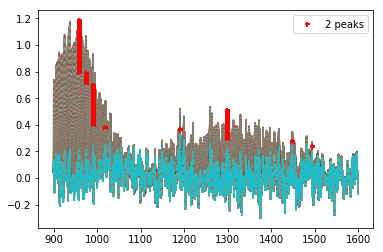

In [30]:
for i in range(num_timeslice):
    pplot(datanm, noisez_matx[:, i], npeak_idx_matx[i, :].astype('int64'))

## Find peaks in original synthetic data ##

In [19]:
num_timeslice_orig = np.shape(dataz_matx)[1]
peak_idx_matx_orig, peak_height_matx_orig, peak_fwhm_matx_orig = peak_matrix(datanm,dataz_matx,num_timeslice_orig, 0, 300)

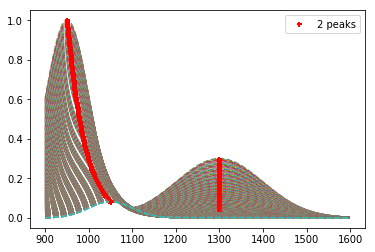

In [20]:
for i in range(num_timeslice):
    pplot(datanm, dataz_matx[:, i], peak_idx_matx_orig[i, :].astype('int64'))

## compare peak position in smooth and original data ##

In [21]:
def peakposition_corr(peak_idx_matx, peak_number):
    
    peak1_idx = peak_idx_matx[:, peak_number]
    peak1_idx_gradient = np.gradient(peak1_idx)
    
    num_wrongpeaks = 1
    while num_wrongpeaks != 0:
        fix_peak_idx = []
        for i, gradient in enumerate(peak1_idx_gradient):
            if np.abs(gradient) >= 10: #threshold for difference in peak idx
                fix_peak_idx += [i]
            else:
                fix_peak_idx = fix_peak_idx
    
        num_wrongpeaks = len(fix_peak_idx)
        for i in range(num_wrongpeaks):
            if fix_peak_idx[i] == np.shape(peak1_idx)[0]-1:
                peak1_idx[fix_peak_idx[i]] = peak1_idx[fix_peak_idx[i]]
            else:
                peak1_idx[fix_peak_idx[i]+1] = peak1_idx[fix_peak_idx[i]]
        peak1_idx_gradient = np.gradient(peak1_idx)
    
#    plt.figure()
#    plt.plot(datatime, peak1_idx, 'o')
    
    peakpos = [datanm[int(idx)] for idx in peak1_idx]

    return peakpos  

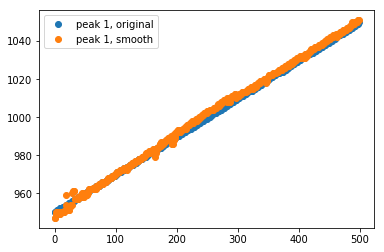

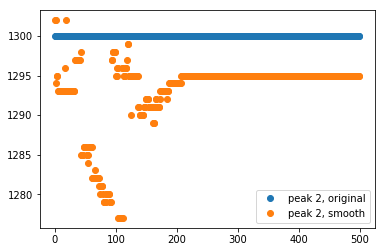

In [22]:
peak1_center_orig = peakposition_corr(peak_idx_matx_orig, 0)
peak2_center_orig = peakposition_corr(peak_idx_matx_orig, 1)
peak1_center = peakposition_corr(peak_idx_matx, 0)
peak2_center = peakposition_corr(peak_idx_matx, 1)

plt.figure()
plt.plot(datatime, peak1_center_orig, 'o', label = 'peak 1, original')
plt.plot(datatime, peak1_center, 'o', label = 'peak 1, smooth')
plt.legend()

plt.figure()
plt.plot(datatime, peak2_center_orig, 'o', label = 'peak 2, original')
plt.plot(datatime, peak2_center, 'o', label = 'peak 2, smooth')
plt.legend()

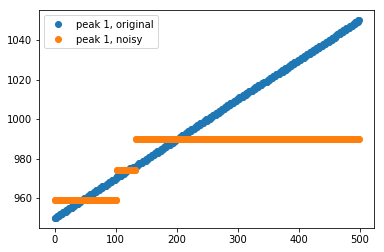

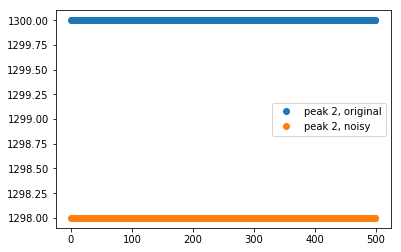

In [32]:
peak1_center_orig = peakposition_corr(peak_idx_matx_orig, 0)
peak2_center_orig = peakposition_corr(peak_idx_matx_orig, 1)
npeak1_center = peakposition_corr(npeak_idx_matx, 0)
npeak2_center = peakposition_corr(npeak_idx_matx, 1)

plt.figure()
plt.plot(datatime, peak1_center_orig, 'o', label = 'peak 1, original')
plt.plot(datatime, npeak1_center, 'o', label = 'peak 1, noisy')
plt.legend()

plt.figure()
plt.plot(datatime, peak2_center_orig, 'o', label = 'peak 2, original')
plt.plot(datatime, npeak2_center, 'o', label = 'peak 2, noisy')
plt.legend()

In [33]:
def peak_pos_eval(original, result):
    error = np.abs(original-result) / original
    
    return error

In [26]:
peak2_eval = peak_pos_eval(np.array(peak2_center_orig), np.array(peak2_center))
peak1_eval = peak_pos_eval(np.array(peak1_center_orig), np.array(peak1_center))

In [35]:
npeak2_eval = peak_pos_eval(np.array(peak2_center_orig), np.array(npeak2_center))
npeak1_eval = peak_pos_eval(np.array(peak1_center_orig), np.array(npeak1_center))

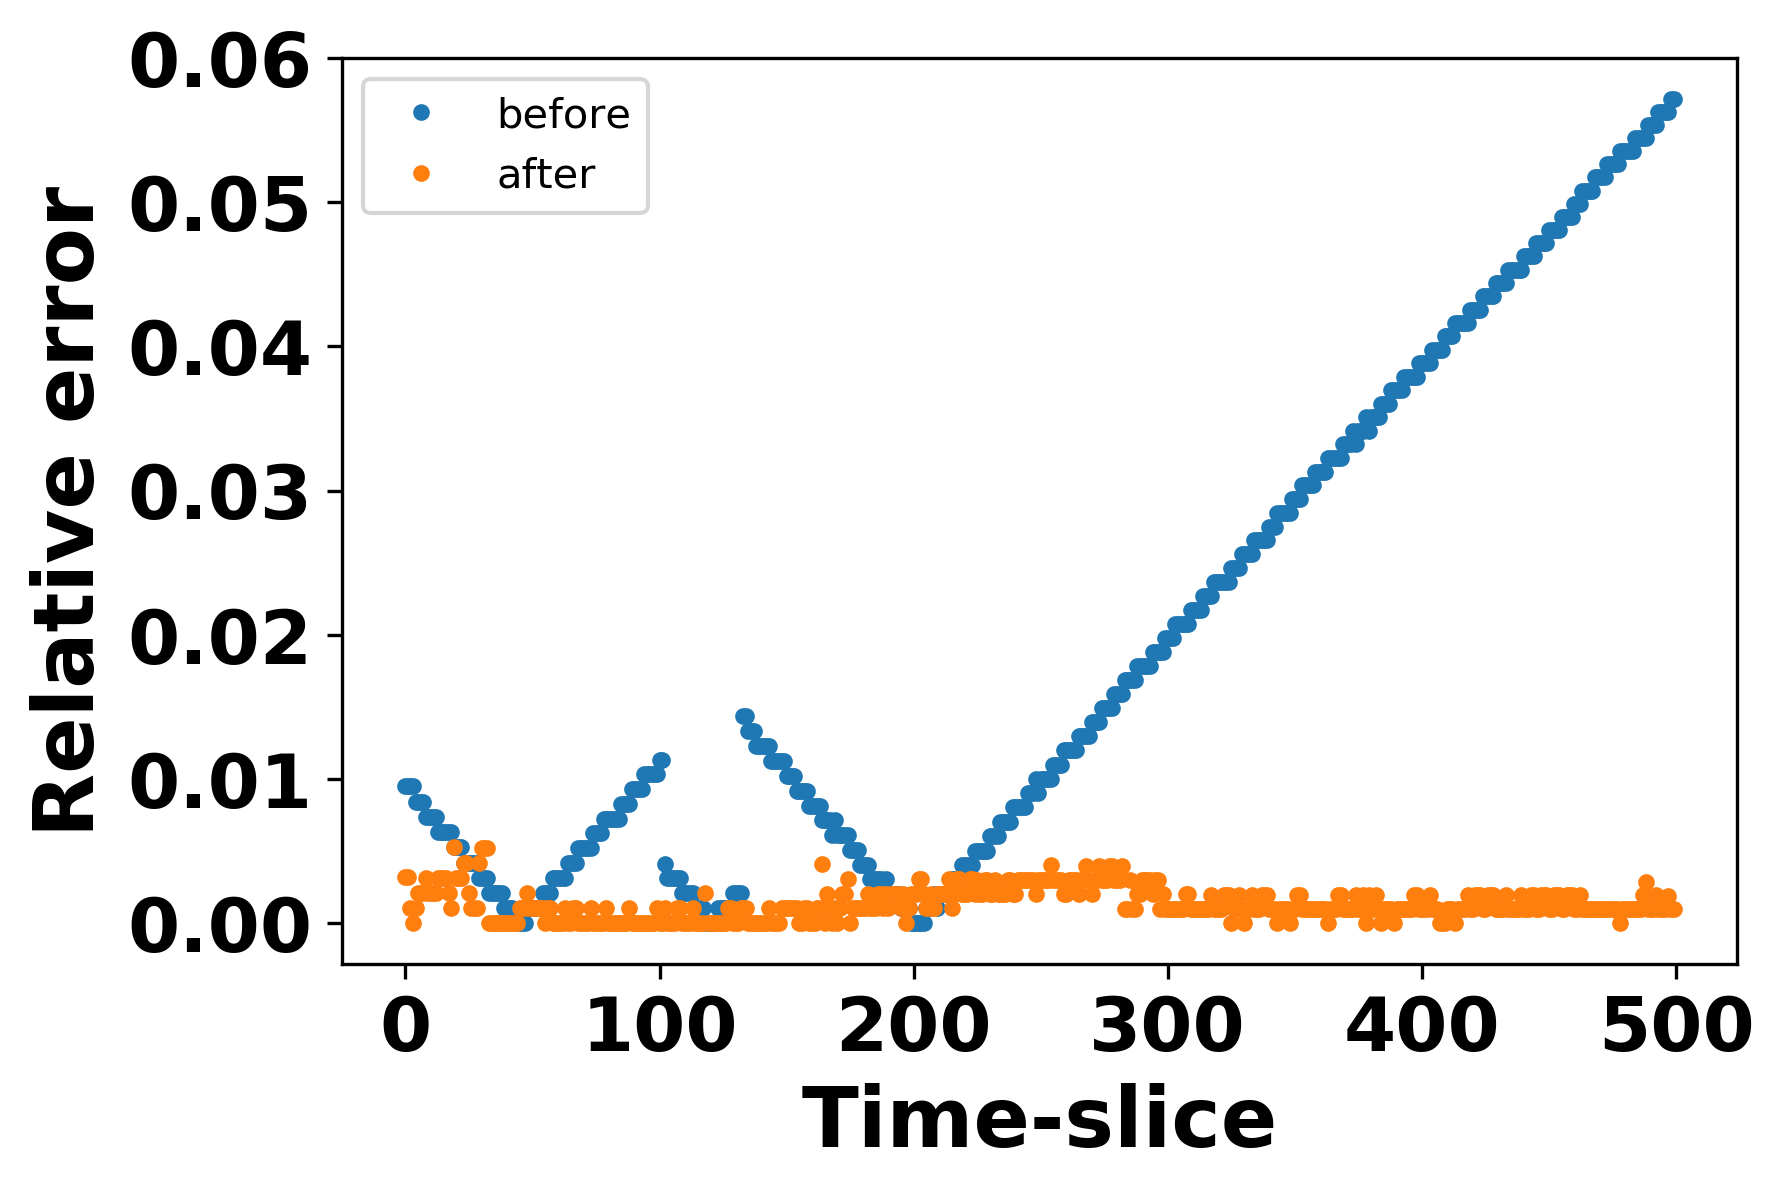

In [43]:
plt.figure(dpi = 300)
plt.xlabel('Time-slice', fontsize = 20, fontweight = 'bold')
plt.ylabel('Relative error', fontsize = 20, fontweight = 'bold')
plt.xticks(fontsize = 18, fontweight = 'bold')
plt.yticks(fontsize = 18, fontweight = 'bold')
plt.plot(datatime, npeak1_eval, 'o', markersize = 3,  label = 'before')
plt.plot(datatime, peak1_eval, 'o', markersize = 3, label = 'after')
plt.legend()

In [ ]:
plt.figure()
plt.plot(datatime, peak2_eval, label = 'after')
plt.plot(datatime, npeak2_eval, label = 'before')

## Peak height problem: 2 peaks --> 1 peak ##

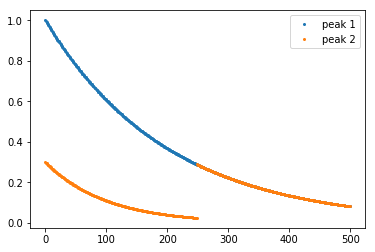

In [129]:
plt.figure()
plt.plot(datatime, peak_height_matx_orig[:,0], 'o', markersize = 2, label = 'peak 1')
plt.plot(datatime, peak_height_matx_orig[:,1], 'o', markersize = 2, label = 'peak 2')
plt.legend()

* I need to make this adaptable to arbitraty number of peaks

In [171]:
def peak_height_mod(peak_height_matx):
    peak_height1 = peak_height_matx[:, 0]
    peak_height2 = peak_height_matx[:, 1]
    sameheight = np.where(peak_height1 == peak_height2)[0]
    
    mean1 = np.mean(peak_height1)
    mean2 = np.mean(peak_height2)
    
    if mean1 < mean2:
        peak_disappear = peak_height1
        peak_nochange = peak_height2
    else:
        peak_disappear = peak_height2
        peak_nochange = peak_height1
        
    len_repeat = len(sameheight)
    samepeak = sameheight
    #print (len_repeat)
    for i in range(len_repeat):
        heightidx = sameheight[i]
    
    #    print (heightidx)
        peak_disappear[heightidx] = peak_disappear[sameheight[0]-1]
    #    print (peak_height2[heightidx])
    
    return samepeak, peak_nochange, peak_disappear

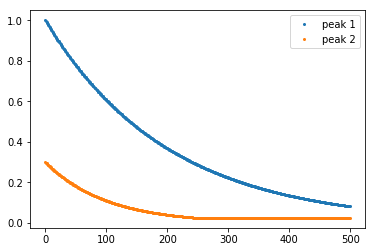

In [172]:
same_peak_orig, peak_nochange_orig, peak_disappear_orig = peak_height_mod(peak_height_matx_orig)

plt.figure()
plt.plot(datatime, peak_nochange_orig, 'o', markersize = 2, label = 'peak 1')
plt.plot(datatime, peak_disappear_orig, 'o', markersize = 2, label = 'peak 2')
plt.legend()

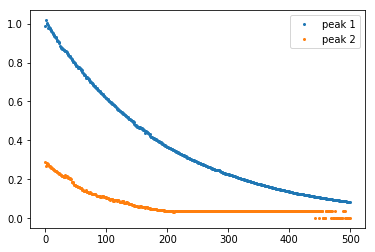

In [173]:
same_peak, peak_nochange, peak_disappear = peak_height_mod(peak_height_matx)

plt.figure()
plt.plot(datatime, peak_nochange, 'o', markersize = 2, label = 'peak 1')
plt.plot(datatime, peak_disappear, 'o', markersize = 2, label = 'peak 2')
plt.legend()

In [ ]:
def peak_width_mod(same_peak, peak_width_matx):
    peak_width1 = peak_width_matx[:, 0]
    peak_width2 = peak_width_matx[:, 1]
    
    mean1 = np.mean(peak_width1)
    mean2 = np.mean(peak_width2)
    
    if mean1 < mean2:
        peak_disappear = peak_height1
        peak_nochange = peak_height2
    else:
        peak_disappear = peak_height2
        peak_nochange = peak_height1
        
    len_repeat = len(same_peak)
    samepeak = sameheight
    #print (len_repeat)
    for i in range(len_repeat):
        widthidx = same_peak[i]
    
    #    print (heightidx)
        peak_disappear[widthidx] = peak_disappear[samepeak[0]-1]
    #    print (peak_height2[heightidx])
    
    return samepeak, peak_nochange, peak_disappear

## Quantitatively measure peak fitting ##

In [157]:
##levenshtein??
##difflib?
##mean??

## Peak widths ##

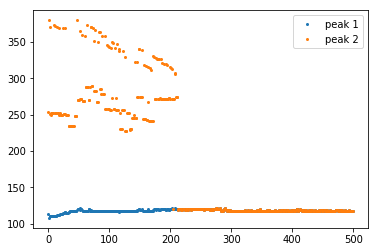

In [124]:
plt.figure()
plt.plot(datatime, peak_fwhm_matx[:,0], 'o', markersize = 2, label = 'peak 1')
plt.plot(datatime, peak_fwhm_matx[:,1], 'o', markersize = 2, label = 'peak 2')
plt.legend()

## Derivatives ##

In [97]:
d1 = np.gradient(peak_height_matx[:,0])
d2 = np.gradient(peak_height_matx[:,0], 2)

d1_orig = np.gradient(peak_idx_matx_orig[:,0])
d2_orig = np.gradient(peak_idx_matx_orig[:,0], 2)

Text(0.5,1,'first derivative')

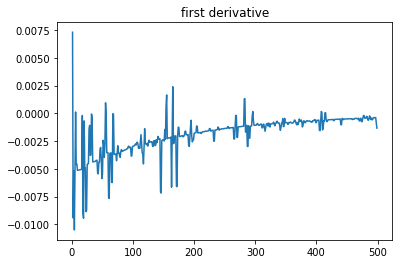

In [101]:
plt.figure()
plt.plot(datatime[1:], d1[1:])
plt.title('first derivative')

/Users/demiliu/miniconda3/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.7-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/demiliu/miniconda3/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.7-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


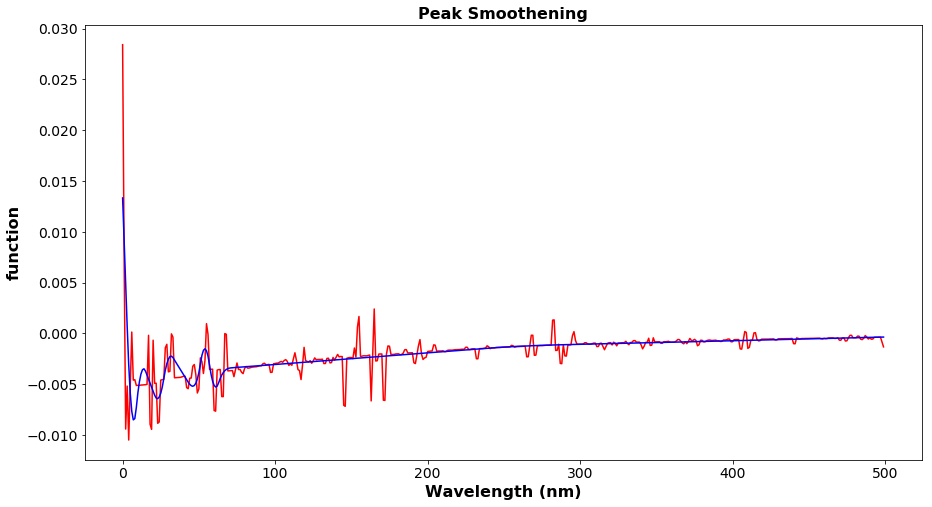

In [100]:
d1_smth = Earth_Smoothing(datatime, d1)

Text(0.5,1,'second derivative')

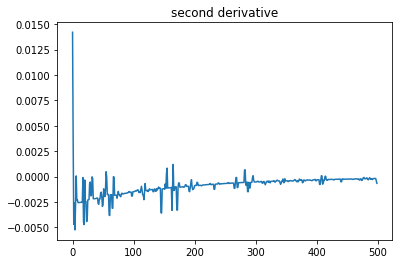

In [99]:
plt.figure()
plt.plot(datatime, d2)

plt.title('second derivative')

Text(0.5,1,'peak height')

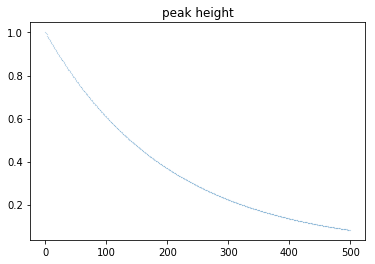

In [66]:
plt.figure()
plt.plot(datatime, peak_height_matx[:,0], 'o', markersize = 0.1)
plt.title('peak height')

## try looking at the entire matrix ##

In [102]:
from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion

In [103]:
#load data
matx_filename = '20180418_twogaussian_spectralshfit.txt'
datanm, datatime, dataz_matx = loaddata(matx_filename)

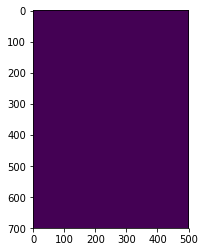

In [104]:
def detect_peaks(image):
    """
    Takes an image and detect the peaks usingthe local maximum filter.
    Returns a boolean mask of the peaks (i.e. 1 when
    the pixel's value is the neighborhood maximum, 0 otherwise)
    """

    # define an 8-connected neighborhood
    neighborhood = generate_binary_structure(2,2)

    #apply the local maximum filter; all pixel of maximal value 
    #in their neighborhood are set to 1
    local_max = maximum_filter(image, footprint=neighborhood)==image
    #local_max is a mask that contains the peaks we are 
    #looking for, but also the background.
    #In order to isolate the peaks we must remove the background from the mask.

    #we create the mask of the background
    background = (image==0)

    #a little technicality: we must erode the background in order to 
    #successfully subtract it form local_max, otherwise a line will 
    #appear along the background border (artifact of the local maximum filter)
    eroded_background = binary_erosion(background, structure=neighborhood, border_value=1)

    #we obtain the final mask, containing only peaks, 
    #by removing the background from the local_max mask (xor operation)
    detected_peaks = local_max ^ eroded_background

    return detected_peaks


#applying the detection and plotting results
plt.figure()

detected_peaks = detect_peaks(dataz_matx)
plt.imshow(detected_peaks)

plt.show()

## modify peak-finding algorithm ##

In [ ]:
def indexes(y, thres=0.3, min_dist=1):
    """Peak detection routine.

    Finds the numeric index of the peaks in *y* by taking its first order difference. By using
    *thres* and *min_dist* parameters, it is possible to reduce the number of
    detected peaks. *y* must be signed.

    Parameters
    ----------
    y : ndarray (signed)
        1D amplitude data to search for peaks.
    thres : float between [0., 1.]
        Normalized threshold. Only the peaks with amplitude higher than the
        threshold will be detected.
    min_dist : int
        Minimum distance between each detected peak. The peak with the highest
        amplitude is preferred to satisfy this constraint.

    Returns
    -------
    ndarray
        Array containing the numeric indexes of the peaks that were detected
    """
    if isinstance(y, np.ndarray) and np.issubdtype(y.dtype, np.unsignedinteger):
        raise ValueError("y must be signed")

    thres = thres * (np.max(y) - np.min(y)) + np.min(y)
    min_dist = int(min_dist)

    # compute first order difference
    dy = np.diff(y)

    # propagate left and right values successively to fill all plateau pixels (0-value)
    zeros,=np.where(dy == 0)
    
    # check if the singal is totally flat
    if len(zeros) == len(y) - 1:
        return np.array([])
    
    while len(zeros):
        # add pixels 2 by 2 to propagate left and right value onto the zero-value pixel
        zerosr = np.hstack([dy[1:], 0.])
        zerosl = np.hstack([0., dy[:-1]])

        # replace 0 with right value if non zero
        dy[zeros]=zerosr[zeros]
        zeros,=np.where(dy == 0)

        # replace 0 with left value if non zero
        dy[zeros]=zerosl[zeros]
        zeros,=np.where(dy == 0)

    # find the peaks by using the first order difference
    peaks = np.where((np.hstack([dy, 0.]) < 0.)
                     & (np.hstack([0., dy]) > 0.)
                     & (y > thres))[0]

    # handle multiple peaks, respecting the minimum distance
    if peaks.size > 1 and min_dist > 1:
        highest = peaks[np.argsort(y[peaks])][::-1]
        rem = np.ones(y.size, dtype=bool)
        rem[peaks] = False

        for peak in highest:
            if not rem[peak]:
                sl = slice(max(0, peak - min_dist), peak + min_dist + 1)
                rem[sl] = True
                rem[peak] = False

        peaks = np.arange(y.size)[~rem]

    return peaks

In [137]:
array = []
len(array)

0